<a href='https://colab.research.google.com/github/ishaqmarashy/red-light-traffic-violation-classification/blob/main/decision%20tree%20classifier.ipynb' target='_parent'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Open In Colab'/></a>

## Preprocess Data

In [1]:
import pandas as pd
import os
import numpy as np

csv_filename1 = "data/tv_noaa.csv"
df = pd.read_csv(csv_filename1)

In [2]:
df.drop(columns=['Accident','Violation Type','Charge','Article','Contributed To Accident','Article','HAZMAT','Personal Injury','Fatal'],inplace=True)

In [3]:
df

,Latitude,Longitude,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,...,LONGITUDE,AWND,PGTM,PRCP,TMAX,WSF2,WSF5,TMIN,WDF2,WDF5
0,38.997645,-77.027105,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,2.2,2301.0,41.1,15.6,9.8,16.1,10.0,300.0,320.0
1,38.997566,-77.109724,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,3.4,1356.0,0.5,12.8,7.6,11.6,6.1,230.0,220.0
2,39.223205,-77.260313,No,Yes,No,No,No,No,MD,02 - Automobile,...,-75.12284,2.9,1452.0,0.0,26.7,6.7,10.7,11.1,230.0,230.0
3,39.057987,-76.968677,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,4.0,1231.0,0.0,18.9,8.1,11.6,7.2,10.0,360.0
4,38.999282,-77.026098,No,Yes,No,No,No,No,MD,02 - Automobile,...,-75.12284,0.9,2212.0,4.3,20.6,4.5,6.7,11.1,320.0,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,0.000000,0.000000,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,1.5,932.0,0.0,22.2,5.4,8.1,13.3,30.0,30.0
1782,0.000000,0.000000,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,1.0,1613.0,0.0,22.2,2.2,3.1,8.3,20.0,360.0
1783,0.000000,0.000000,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,0.8,1159.0,0.0,23.3,3.6,6.3,6.7,160.0,200.0
1784,39.144320,-77.067415,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,3.8,1519.0,0.0,9.4,8.9,13.0,1.1,290.0,310.0


https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html

https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html

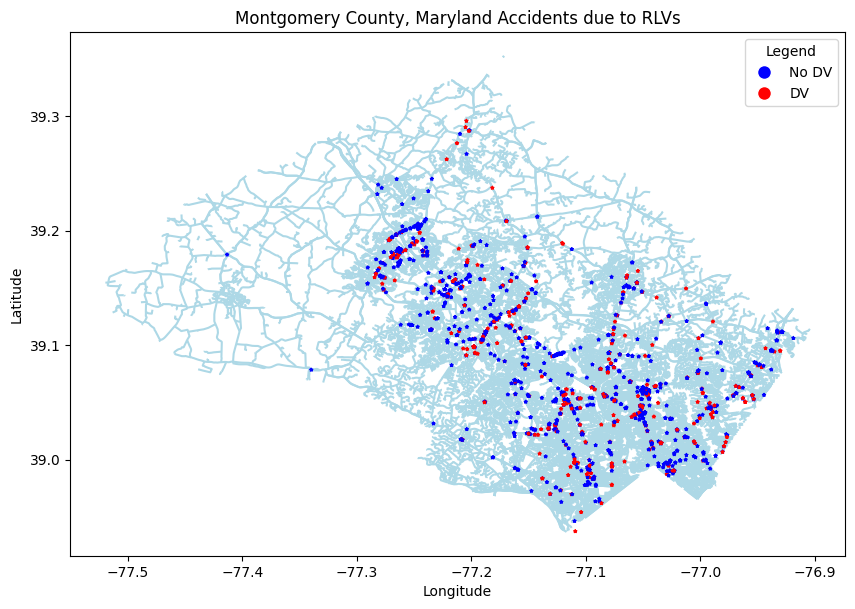

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

filtered_df = df[(df['Latitude'] != 0) & (df['Longitude'] != 0) & (df['Longitude'] <= -76.9)& (df['Latitude'] >=38.93)]
montgomery_shapefile_path = './data/roads/tl_2019_24031_roads.shp'
montgomery_gdf = gpd.read_file(montgomery_shapefile_path)

geometry = [Point(xy) for xy in zip(filtered_df['Longitude'], filtered_df['Latitude'])]
geo_points = gpd.GeoDataFrame(filtered_df, geometry=geometry)

fig, ax = plt.subplots(figsize=(10, 10))

montgomery_gdf.plot(ax=ax, color='lightblue', edgecolor='black', zorder=1)
geo_points.plot(ax=ax, marker='*', color=filtered_df['DV'].map({0: 'blue', 1: 'red'}), markersize=5, zorder=2)

legend_labels = {0: 'No DV', 1: 'DV'}
ax.legend([plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)],
          [legend_labels[0], legend_labels[1]], title='Legend', loc='upper right')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Montgomery County, Maryland Accidents due to RLVs')
plt.show()


In [5]:
df.drop(columns=['Latitude', 'Longitude'],inplace=True)

In [6]:
df.isna().sum()

Belts                 0
Property Damage       0
Commercial License    0
Commercial Vehicle    0
Alcohol               0
Work Zone             0
State                 0
VehicleType           0
Year                  1
Make                  0
Model                 0
Color                 5
Race                  0
Gender                0
Driver City           0
Driver State          0
DL State              1
DV                    0
DATE                  0
LATITUDE              0
LONGITUDE             0
AWND                  0
PGTM                  0
PRCP                  0
TMAX                  0
WSF2                  0
WSF5                  0
TMIN                  0
WDF2                  0
WDF5                  0
dtype: int64

In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer


data_for_imputation = df.copy()

categorical_imputer = SimpleImputer(strategy='most_frequent')

imputed_values = categorical_imputer.fit_transform(data_for_imputation)

imputed_df = pd.DataFrame(imputed_values,columns=df.columns)

df= imputed_df

df


,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,...,LONGITUDE,AWND,PGTM,PRCP,TMAX,WSF2,WSF5,TMIN,WDF2,WDF5
0,No,No,No,No,No,No,MD,02 - Automobile,2020.0,LINC,...,-75.12284,2.2,2301.0,41.1,15.6,9.8,16.1,10.0,300.0,320.0
1,No,No,No,No,No,No,MD,02 - Automobile,2023.0,MAZDA,...,-75.12284,3.4,1356.0,0.5,12.8,7.6,11.6,6.1,230.0,220.0
2,No,Yes,No,No,No,No,MD,02 - Automobile,2023.0,VOLK,...,-75.12284,2.9,1452.0,0.0,26.7,6.7,10.7,11.1,230.0,230.0
3,No,No,No,No,No,No,MD,02 - Automobile,2012.0,HONDA,...,-75.12284,4.0,1231.0,0.0,18.9,8.1,11.6,7.2,10.0,360.0
4,No,Yes,No,No,No,No,MD,02 - Automobile,2018.0,HOND,...,-75.12284,0.9,2212.0,4.3,20.6,4.5,6.7,11.1,320.0,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,No,No,No,No,No,No,MD,02 - Automobile,2005.0,HOND,...,-75.12284,1.5,932.0,0.0,22.2,5.4,8.1,13.3,30.0,30.0
1782,No,No,No,No,No,No,MD,02 - Automobile,1997.0,MITS,...,-75.12284,1.0,1613.0,0.0,22.2,2.2,3.1,8.3,20.0,360.0
1783,No,No,No,No,No,No,MD,02 - Automobile,2005.0,HOND,...,-75.12284,0.8,1159.0,0.0,23.3,3.6,6.3,6.7,160.0,200.0
1784,No,No,No,No,No,No,MD,02 - Automobile,1996.0,ISUZU,...,-75.12284,3.8,1519.0,0.0,9.4,8.9,13.0,1.1,290.0,310.0


In [8]:
df['VehicleType'].value_counts()

VehicleType
02 - Automobile              1580
05 - Light Duty Truck          90
28 - Other                     40
03 - Station Wagon             31
01 - Motorcycle                18
06 - Heavy Duty Truck          15
10 - Transit Bus                6
07 - Truck/Road Tractor         3
08 - Recreational Vehicle       1
20 - Commercial Rig             1
29 - Unknown                    1
Name: count, dtype: int64

In [9]:
def classify_vehicle(vehicle_type):
    if any(category in vehicle_type for category in ['01 - Motorcycle']):
        return 'Light'
    elif any(category in vehicle_type for category in ['28 - Other','29 - Unknown', '03 - Station Wagon', '02 - Automobile']):
        return 'Medium'
    else:
        return 'Heavy'
    
df['VehicleType'] = df['VehicleType'].apply(classify_vehicle)

In [10]:
df['Year']=df['Year'].astype(int)
df['Vehicle'] = df[[ 'Year', 'Make', 'Model']].astype(str).apply(lambda x: ', '.join(x), axis=1)
df.drop(columns=['Year', 'Make', 'Model'],inplace=True)

In [11]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['Weekend'] = df['DATE'].dt.dayofweek.apply(lambda x: 1 if x in [5, 6] else 0)
df['Time'] = df['DATE'].dt.time
df['DATE'] = df['DATE'].dt.date
df['Day of Week'] = pd.to_datetime(df['DATE']).dt.dayofweek + 1


In [12]:
def categorize_time(time):
    if 5 < time.hour <= 9:
        return 'am-peak'
    elif 16 < time.hour <= 20:
        return 'pm-peak'
    else:
        return 'off-peak'
    
df['TimeCategory'] = df['Time'].apply(categorize_time)

In [13]:
def categorize_time(time):
    if 0 < time.hour <= 12:
        return 'AM'
    else:
        return 'PM'
    
df['TimeCategory_AMPM'] = df['Time'].apply(categorize_time)

In [14]:
def categorize_time_custom(time):
    if 0 < time.hour <= 6:
        return 'Night'
    elif 6 < time.hour <= 12:
        return 'Morning'
    elif 12 < time.hour <= 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['TimeCategory_NMAE'] = df['Time'].apply(categorize_time_custom)


In [15]:
df['Day of Week'] = np.sin((2 * np.pi *pd.to_datetime(df['DATE']).dt.dayofweek + 1)/ (7))

In [16]:
def sine_of_time(time):
    return np.sin ((time.hour ) / (24))

df['SinOfTime'] = df['Time'].apply(sine_of_time)

In [17]:
def time_of_day(time):
    return time.hour 

df['Time'] = df['Time'].apply(time_of_day)

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

columns_to_label_encode = ['Belts', 'Property Damage', 'Commercial License', 'TimeCategory_AMPM',
                           'Commercial Vehicle', 'Alcohol', 'Gender', 'Work Zone']

columns_to_onehot_encode = ['VehicleType','Race', 'TimeCategory','TimeCategory_NMAE']

for column in columns_to_label_encode:
    df[column] = label_encoder.fit_transform(df[column])

onehot_encoded = onehot_encoder.fit_transform(df[columns_to_onehot_encode]).toarray()
onehot_columns = onehot_encoder.get_feature_names_out(columns_to_onehot_encode)
df_onehot = pd.DataFrame(onehot_encoded, columns=onehot_columns)

df = pd.concat([df, df_onehot], axis=1)

df = df.drop(columns=columns_to_onehot_encode)
df

,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,State,Color,Gender,Driver City,...,Race_NATIVE AMERICAN,Race_OTHER,Race_WHITE,TimeCategory_am-peak,TimeCategory_off-peak,TimeCategory_pm-peak,TimeCategory_NMAE_Afternoon,TimeCategory_NMAE_Evening,TimeCategory_NMAE_Morning,TimeCategory_NMAE_Night
0,0,0,0,0,0,0,MD,WHITE,0,COLUMBIA,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,MD,"BLUE, LIGHT",1,LANHAM,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0,1,0,0,0,0,MD,WHITE,0,CLARKSBURG,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,0,0,0,0,0,MD,GRAY,0,SILVER SPRING,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,1,0,0,0,0,MD,BLACK,0,SILVER SPRING,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,0,0,0,0,0,0,MD,GREEN,1,OLNEY,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1782,0,0,0,0,0,0,MD,BLACK,1,POTOMAC,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1783,0,0,0,0,0,0,MD,BLACK,1,OLNEY,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1784,0,0,0,0,0,0,MD,WHITE,1,GERMANTOWN,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [19]:
df.columns

Index(['Belts', 'Property Damage', 'Commercial License', 'Commercial Vehicle',
       'Alcohol', 'Work Zone', 'State', 'Color', 'Gender', 'Driver City',
       'Driver State', 'DL State', 'DV', 'DATE', 'LATITUDE', 'LONGITUDE',
       'AWND', 'PGTM', 'PRCP', 'TMAX', 'WSF2', 'WSF5', 'TMIN', 'WDF2', 'WDF5',
       'Vehicle', 'Weekend', 'Time', 'Day of Week', 'TimeCategory_AMPM',
       'SinOfTime', 'VehicleType_Heavy', 'VehicleType_Light',
       'VehicleType_Medium', 'Race_ASIAN', 'Race_BLACK', 'Race_HISPANIC',
       'Race_NATIVE AMERICAN', 'Race_OTHER', 'Race_WHITE',
       'TimeCategory_am-peak', 'TimeCategory_off-peak', 'TimeCategory_pm-peak',
       'TimeCategory_NMAE_Afternoon', 'TimeCategory_NMAE_Evening',
       'TimeCategory_NMAE_Morning', 'TimeCategory_NMAE_Night'],
      dtype='object')

In [20]:
df=df[[
'Belts', 'Commercial License', 'Commercial Vehicle',
'Alcohol', 'Work Zone', 'SinOfTime', 'Gender', 'DV', 
'Property Damage', 
'Day of Week','Weekend',
'TMIN', 'WDF2', 'WDF5', 'AWND', 'PGTM', 'PRCP', 'TMAX', 'WSF2', 'WSF5',
'VehicleType_Heavy', 'VehicleType_Light', 'VehicleType_Medium',
'Race_ASIAN', 'Race_BLACK', 'Race_HISPANIC', 'Race_NATIVE AMERICAN','Race_OTHER', 'Race_WHITE', 
'TimeCategory_am-peak', 'TimeCategory_off-peak','TimeCategory_pm-peak','TimeCategory_AMPM',
'TimeCategory_NMAE_Afternoon', 'TimeCategory_NMAE_Evening','TimeCategory_NMAE_Morning', 'TimeCategory_NMAE_Night',
       ]]

In [21]:
x=df.drop(columns=['DV'])
y=df['DV']


x['AWND'] = pd.to_numeric(x['AWND'], errors='coerce')
x['PGTM'] = pd.to_numeric(x['PGTM'], errors='coerce')
x['PRCP'] = pd.to_numeric(x['PRCP'], errors='coerce')
x['TMAX'] = pd.to_numeric(x['TMAX'], errors='coerce')
x['WSF2'] = pd.to_numeric(x['WSF2'], errors='coerce')
x['WSF5'] = pd.to_numeric(x['WSF5'], errors='coerce')
x['TMIN'] = pd.to_numeric(x['TMIN'], errors='coerce')
x['WDF2'] = pd.to_numeric(x['WDF2'], errors='coerce')
x['WDF5'] = pd.to_numeric(x['WDF5'], errors='coerce')
y = pd.to_numeric(y, errors='coerce')

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,
                                                    random_state=42, stratify=y)

## SMOTE

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [23]:
y.value_counts()

DV
0    1227
1     559
Name: count, dtype: int64

In [24]:
print(x.dtypes) 
print(y.dtypes)  

Belts                            int32
Commercial License               int32
Commercial Vehicle               int32
Alcohol                          int32
Work Zone                        int32
SinOfTime                      float64
Gender                           int32
Property Damage                  int32
Day of Week                    float64
Weekend                          int64
TMIN                           float64
WDF2                           float64
WDF5                           float64
AWND                           float64
PGTM                           float64
PRCP                           float64
TMAX                           float64
WSF2                           float64
WSF5                           float64
VehicleType_Heavy              float64
VehicleType_Light              float64
VehicleType_Medium             float64
Race_ASIAN                     float64
Race_BLACK                     float64
Race_HISPANIC                  float64
Race_NATIVE AMERICAN     

In [25]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_OS, y_OS = oversample.fit_resample(X_train, y_train)

In [26]:
y_OS.value_counts()

DV
0    981
1    981
Name: count, dtype: int64

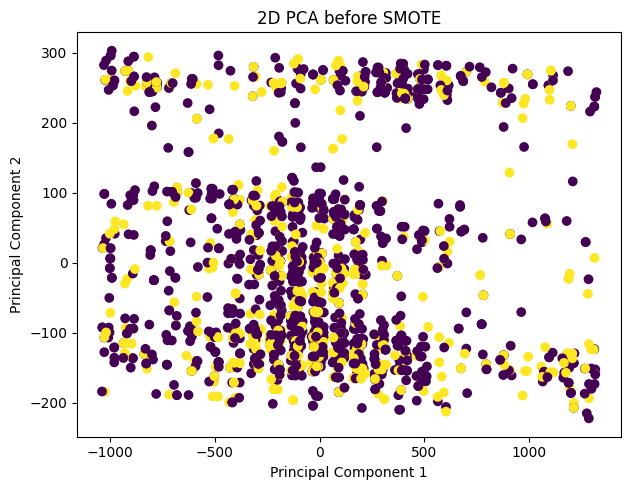

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['Label'] = y

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('2D PCA before SMOTE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


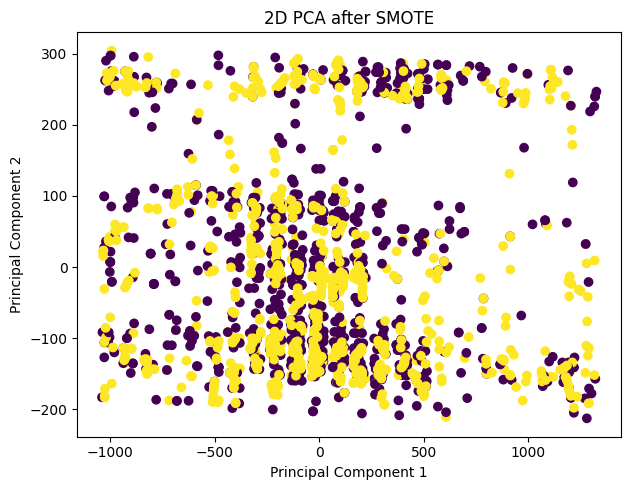

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_OS)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['Label'] = y_OS

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_OS, cmap='viridis')
plt.title('2D PCA after SMOTE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchbnn as bnn
import matplotlib.pyplot as plt

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_OS.values)
X_test_normalized = scaler.transform(X_test.values)


os_x_train_tensor = torch.FloatTensor(X_train_normalized)
os_y_train_tensor = torch.FloatTensor(y_OS.values)

X_train_normalized = scaler.transform(X_train.values)

x_train_tensor = torch.FloatTensor(X_train_normalized)
y_train_tensor = torch.FloatTensor(y_train.values)
x_test_tensor = torch.FloatTensor(X_test_normalized)
y_test_tensor = torch.FloatTensor(y_test.values)

In [31]:
len(os_x_train_tensor)

1962

In [32]:
len(x_train_tensor)

1428

In [33]:
import pandas as pd

corr_matrix = pd.concat([x,y],axis=1).corr()

target_corr = corr_matrix['DV']

sorted_corr = target_corr.abs().sort_values(ascending=False)

top_features = sorted_corr.index[1:] 

top_corr_values = target_corr[top_features]

result_df = pd.DataFrame({'Feature': top_features, 'Correlation': top_corr_values})
print(result_df)

                                                 Feature  Correlation
Property Damage                          Property Damage    -0.371355
Belts                                              Belts     0.157717
TimeCategory_NMAE_Morning      TimeCategory_NMAE_Morning     0.104247
TimeCategory_NMAE_Evening      TimeCategory_NMAE_Evening    -0.096966
TimeCategory_NMAE_Night          TimeCategory_NMAE_Night    -0.094619
TimeCategory_am-peak                TimeCategory_am-peak     0.075678
TimeCategory_off-peak              TimeCategory_off-peak    -0.068501
TimeCategory_NMAE_Afternoon  TimeCategory_NMAE_Afternoon     0.060365
Commercial License                    Commercial License     0.057843
VehicleType_Medium                    VehicleType_Medium    -0.055274
VehicleType_Heavy                      VehicleType_Heavy     0.052393
WDF5                                                WDF5     0.048520
Gender                                            Gender    -0.039646
Race_HISPANIC       

### XGBo
ost

In [34]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import numpy as np
np.int=np.int_
search_space = {
    'max_depth': Integer(1, 100),
    'min_child_weight': Integer(1, 10),
    'subsample': Real(0.01, 1.0, 'uniform'),
    'colsample_bytree': Real(0.01, 1.0, 'uniform'),
    'gamma': Real(0.1, 10, 'uniform'),
    'learning_rate': Real(0.1, 1.0, 'uniform')
}

def bayesian_optimization_xgboost(x_train, y_train, x_test, y_test, search_space, n_calls=10):
    clf = XGBClassifier(
        objective='binary:logistic',
        n_estimators=200,
        eval_metric='logloss',
        random_state=42
    )

    opt = BayesSearchCV(
        clf,
        search_space,
        n_iter=n_calls,
        scoring='accuracy',
        cv=5,
        n_jobs=-1,
        random_state=42
    )

    opt.fit(x_train, y_train)

    print('Best Accuracy: {:.3f}'.format(1.0 - opt.best_score_))
    print('Best Parameters:', opt.best_params_)
    
    test_predicted = opt.predict(x_test)
    test_accuracy = accuracy_score(test_predicted, y_test)

    print('Accuracy on Test Set: {:.3f}'.format(test_accuracy))

    return opt

result = bayesian_optimization_xgboost(X_train, y_train, X_test, y_test, search_space, n_calls=100)


Best Accuracy: 0.240
Best Parameters: OrderedDict([('colsample_bytree', 0.3790879299029885), ('gamma', 4.225815371353463), ('learning_rate', 0.3731440055435865), ('max_depth', 1), ('min_child_weight', 1), ('subsample', 0.6284863708732368)])
Accuracy on Test Set: 0.729


In [35]:
result.best_params_

OrderedDict([('colsample_bytree', 0.3790879299029885),
             ('gamma', 4.225815371353463),
             ('learning_rate', 0.3731440055435865),
             ('max_depth', 1),
             ('min_child_weight', 1),
             ('subsample', 0.6284863708732368)])

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

clf = XGBClassifier(
    n_estimators=200,
    random_state=42,**result.best_params_
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.729050279329609

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82       246
           1       0.61      0.38      0.47       112

    accuracy                           0.73       358
   macro avg       0.68      0.64      0.64       358
weighted avg       0.71      0.73      0.71       358



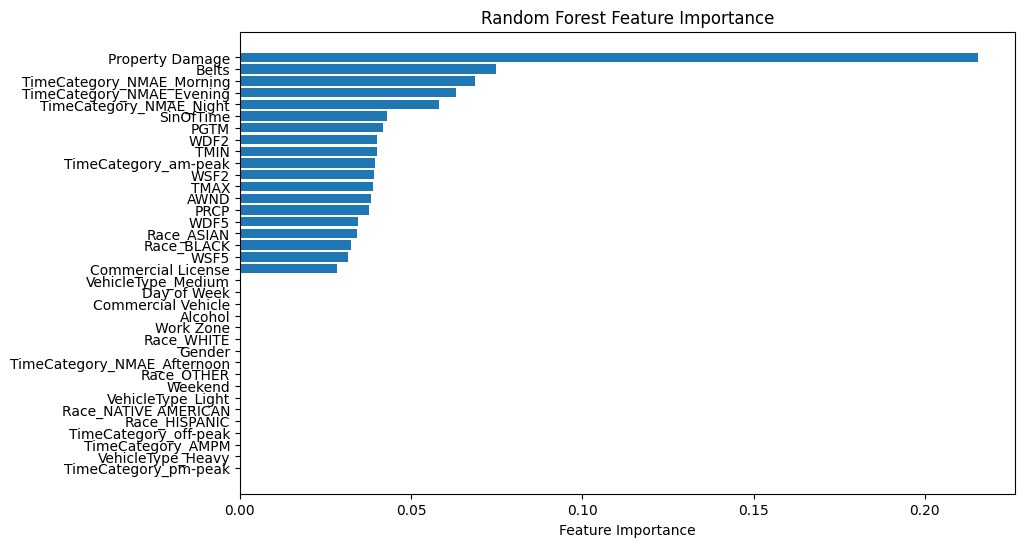

In [37]:
import matplotlib.pyplot as plt

feature_importances = clf.feature_importances_
feature_names = x.columns 

sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


In [38]:
from xgboost import XGBClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score, classification_report


clf = XGBClassifier(
    n_estimators=200,
    random_state=42,**result.best_params_
)

sfs = SequentialFeatureSelector(clf, n_features_to_select=30, direction='backward')
sfs.fit(X_train, y_train)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

selected_features = X_train.columns[sfs.get_support()]
X_train_selected = sfs.transform(X_train)
X_val_selected = sfs.transform(X_test)

clf.fit(X_train_selected, y_train)

y_val_pred = clf.predict(X_val_selected)
classification_rep = classification_report(y_test, y_val_pred)

print("Selected Features:", selected_features)
print("Validation Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


Selected Features: Index(['Belts', 'Commercial License', 'Commercial Vehicle', 'Alcohol',
       'Work Zone', 'SinOfTime', 'Property Damage', 'Day of Week', 'TMIN',
       'AWND', 'PGTM', 'PRCP', 'TMAX', 'WSF2', 'WSF5', 'VehicleType_Heavy',
       'VehicleType_Light', 'VehicleType_Medium', 'Race_BLACK',
       'Race_HISPANIC', 'Race_NATIVE AMERICAN', 'Race_OTHER', 'Race_WHITE',
       'TimeCategory_am-peak', 'TimeCategory_off-peak', 'TimeCategory_pm-peak',
       'TimeCategory_AMPM', 'TimeCategory_NMAE_Afternoon',
       'TimeCategory_NMAE_Evening', 'TimeCategory_NMAE_Morning'],
      dtype='object')
Validation Accuracy: 0.729050279329609

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       246
           1       0.58      0.38      0.46       112

    accuracy                           0.72       358
   macro avg       0.67      0.63      0.64       358
weighted avg       0.70      0.72      0.70       358



In [39]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [40]:
result= bayesian_optimization_xgboost(X_train_selected, y_train, X_test_selected, y_test, search_space, n_calls=30)

Best Accuracy: 0.247
Best Parameters: OrderedDict([('colsample_bytree', 1.0), ('gamma', 10.0), ('learning_rate', 0.4834771460880951), ('max_depth', 100), ('min_child_weight', 7), ('subsample', 0.6885287242671091)])
Accuracy on Test Set: 0.696


In [41]:
from sklearn.metrics import classification_report, accuracy_score

clf = XGBClassifier(**result.best_params_,
    n_estimators=200,
    random_state=42,
)
clf.fit(X_train_selected, y_train)

y_pred = clf.predict(X_test_selected)

classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


              precision    recall  f1-score   support

           0       0.73      0.87      0.80       246
           1       0.52      0.30      0.38       112

    accuracy                           0.70       358
   macro avg       0.63      0.59      0.59       358
weighted avg       0.67      0.70      0.67       358



-----------------------